In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from IPython.display import display 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train_data=pd.read_csv('train_data.csv',sep=',')
print("N.o of rows/columns %d,%d" %(train_data.shape))
display(train_data.describe())

N.o of rows/columns 169307,43


,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
count,169307.000000,1.693070e+05,1.693070e+05,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,...,169307.000000,169307.000000,169307.0,169307.000000,169307.000000,169307.000000,169307.000000,169307.00000,169307.000000,169307.000000
mean,44.136722,1.077011e+03,7.501477e+02,0.171399,0.171479,0.062442,0.062478,0.791319,0.021317,0.028090,...,0.000077,0.001057,0.0,0.000006,0.000868,330.966203,291.598014,232.98837,189.733508,0.633719
std,659.337783,4.302746e+04,3.527929e+04,0.376214,0.376593,0.241000,0.241354,0.388389,0.084299,0.139745,...,0.009412,0.036762,0.0,0.002430,0.029453,213.028182,246.012392,63.94995,105.631984,0.816991
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,118.000000,10.000000,255.00000,58.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,510.000000,510.000000,255.00000,255.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,255.00000,255.000000,1.000000
max,42596.000000,1.139690e+07,1.173059e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,0.0,1.000000,1.000000,511.000000,511.000000,255.00000,255.000000,2.000000


In [4]:
display(train_data.head())

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2


In [5]:
train_data.isnull().any().any()

False

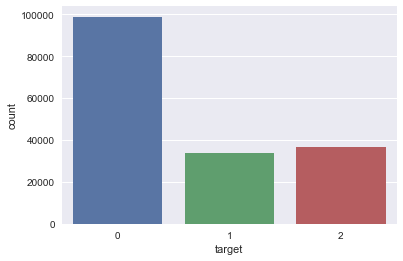

In [6]:
ax = sns.countplot(x="target", data=train_data)

In [7]:
print("Percentage of 0's %.2f" %(len(train_data[train_data['target']==0])/train_data.shape[0]))
print("Percentage of 1's %.2f" %(len(train_data[train_data['target']==1])/train_data.shape[0]))
print("Percentage of 2's %.2f" %(len(train_data[train_data['target']==2])/train_data.shape[0]))

Percentage of 0's 0.58
Percentage of 1's 0.20
Percentage of 2's 0.22


In [8]:
from collections import Counter
Counter(train_data.dtypes.values)

Counter({dtype('int64'): 27, dtype('float64'): 15, dtype('O'): 1})

In [9]:
train_data.columns

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169307 entries, 0 to 169306
Data columns (total 43 columns):
connection_id    169307 non-null object
cont_1           169307 non-null int64
cont_2           169307 non-null int64
cont_3           169307 non-null int64
cont_4           169307 non-null float64
cont_5           169307 non-null float64
cont_6           169307 non-null float64
cont_7           169307 non-null float64
cont_8           169307 non-null float64
cont_9           169307 non-null float64
cont_10          169307 non-null float64
cont_11          169307 non-null float64
cont_12          169307 non-null float64
cont_13          169307 non-null float64
cont_14          169307 non-null float64
cont_15          169307 non-null float64
cont_16          169307 non-null float64
cont_17          169307 non-null float64
cont_18          169307 non-null float64
cat_1            169307 non-null int64
cat_2            169307 non-null int64
cat_3            169307 non-null int64


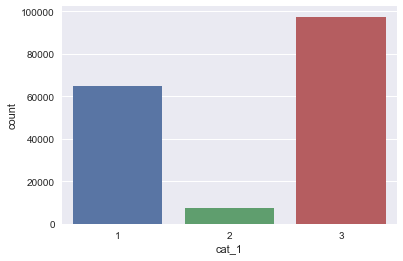

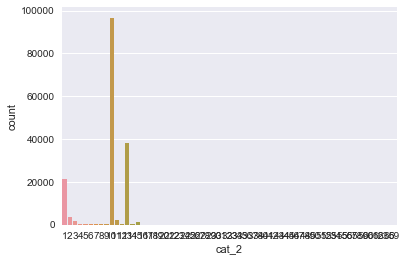

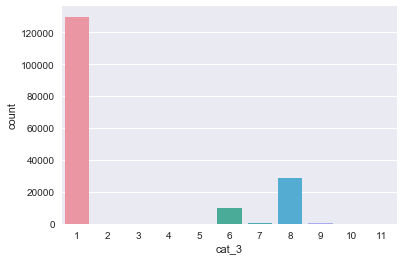

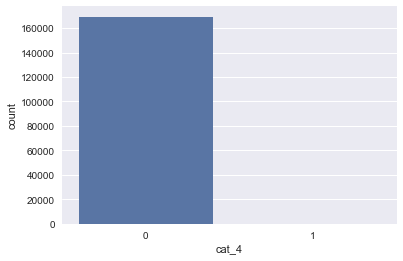

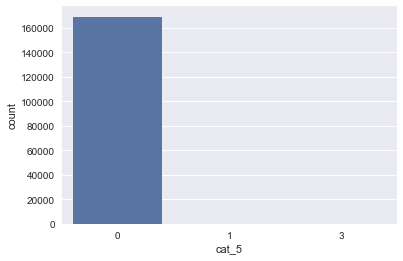

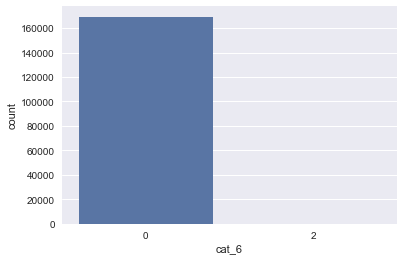

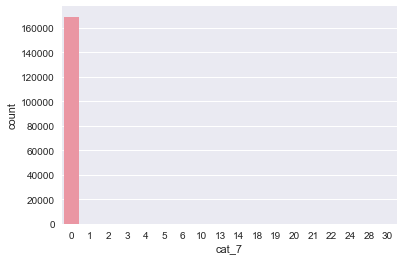

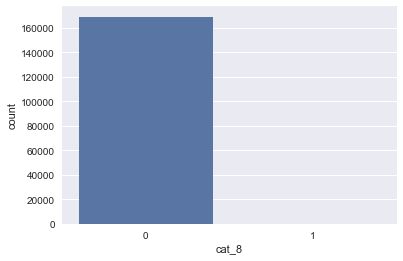

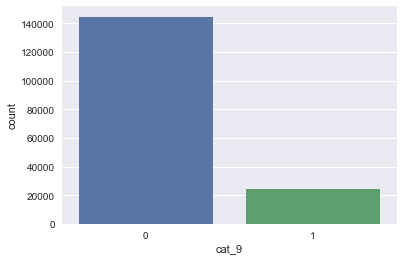

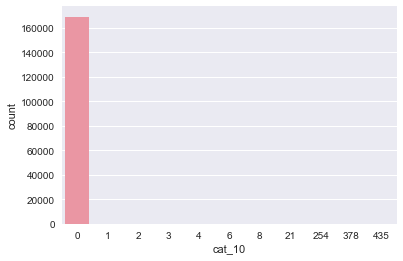

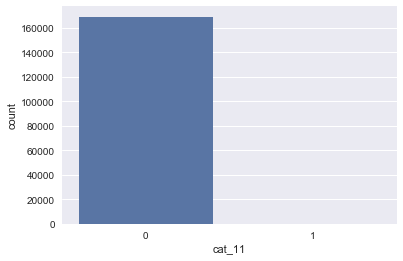

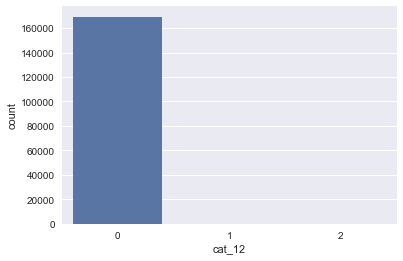

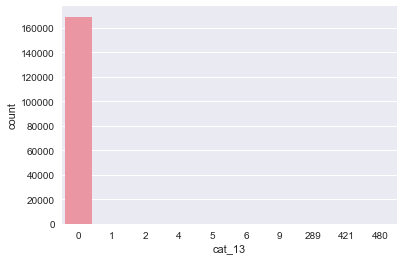

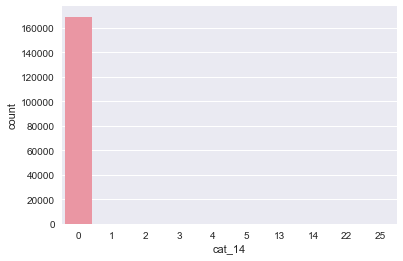

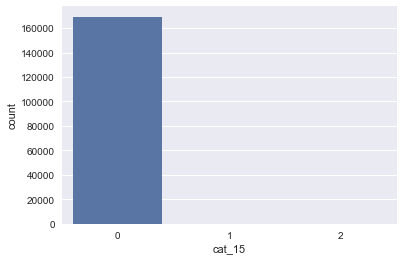

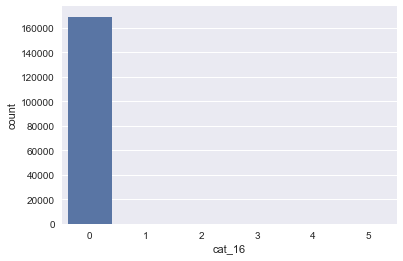

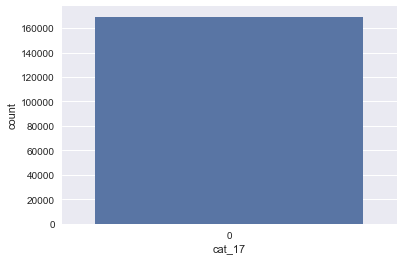

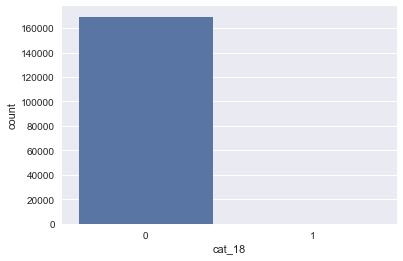

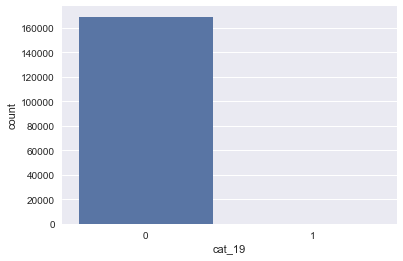

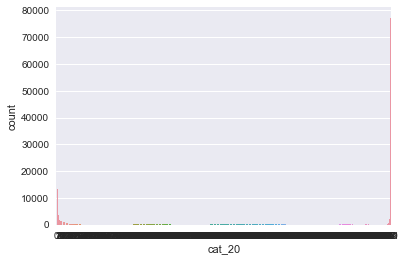

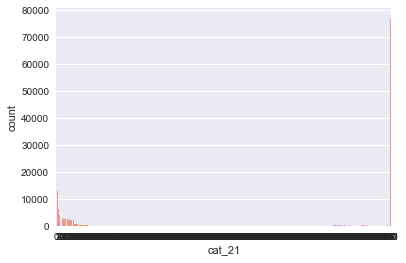

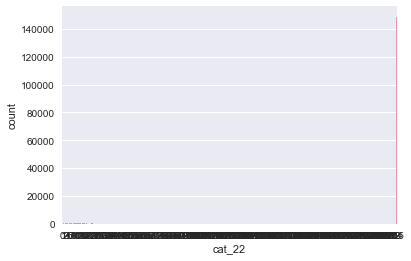

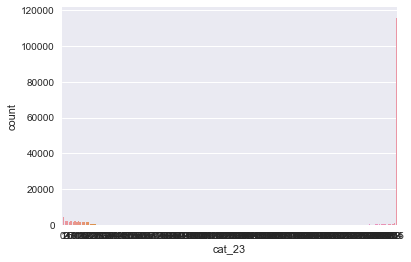

In [11]:
for x in train_data.columns[19:-1]:
    ax = sns.countplot(x=train_data[x], data=train_data)
    plt.show()

# cat_4, cat_5, cat_6, cat_7, cat_8, cat_10, cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19
All the above have same value through out the train data which is kind of suggests that these variables are same no matter what the target variable is.
Which suggests that these are not important to train the model.

In [12]:
unimportant_columns=['cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_10', 'cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19']

In [13]:
for x in train_data.columns[19:-1]:
    print("Uniques for Column %s" %(x))
    print(train_data[x].unique())

Uniques for Column cat_1
[3 1 2]
Uniques for Column cat_2
[10  1 13 11  4 15  2  5 30 55 46  3 23 14 38 27 16 59  7  9 48  6 22 45 26
  8 52 54 32 37 12 20 56 47 58 57 21 29 62 49 51 41 50 53 18 44 34 36 42 60
 43 61 31 35 19 24 40 25 17 28 33 63 65 69]
Uniques for Column cat_3
[ 1  8  6 11  9  3  7  2  4 10  5]
Uniques for Column cat_4
[0 1]
Uniques for Column cat_5
[0 1 3]
Uniques for Column cat_6
[0 2]
Uniques for Column cat_7
[ 0  5 22  6  2 14  4  1 28 20 24 18 19 13 30  3 10 21]
Uniques for Column cat_8
[0 1]
Uniques for Column cat_9
[0 1]
Uniques for Column cat_10
[  0   2   1 378   4   3   6   8 435  21 254]
Uniques for Column cat_11
[0 1]
Uniques for Column cat_12
[0 2 1]
Uniques for Column cat_13
[  0   9   1   6   5 421   2   4 480 289]
Uniques for Column cat_14
[ 0  1 25  5  4  2 22 13 14  3]
Uniques for Column cat_15
[0 1 2]
Uniques for Column cat_16
[0 1 3 2 4 5]
Uniques for Column cat_17
[0]
Uniques for Column cat_18
[0 1]
Uniques for Column cat_19
[0 1]
Uniques for Colu

In [14]:
train_float = train_data.select_dtypes(include=['float64'])
train_int = train_data.select_dtypes(include=['int64'])

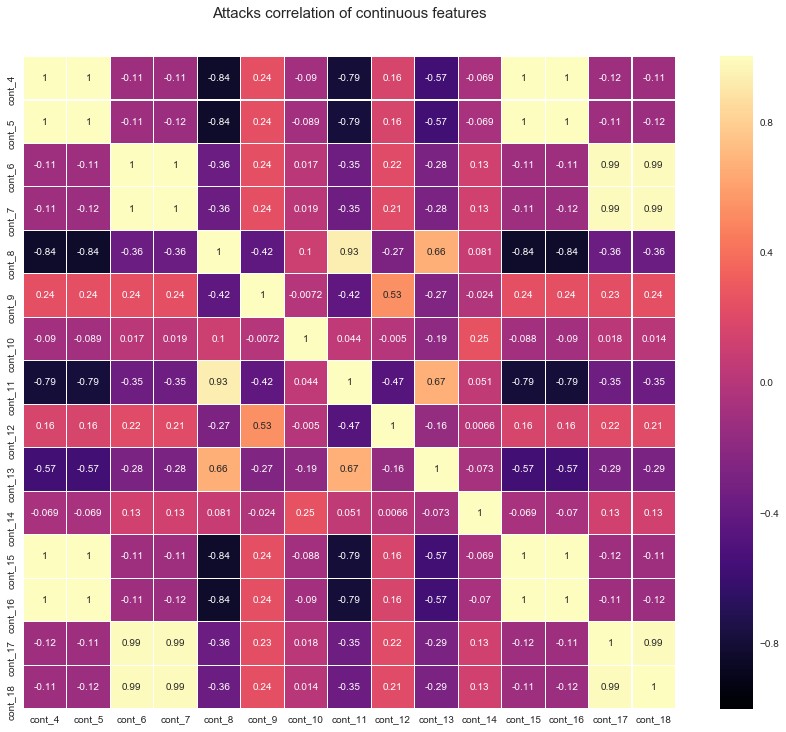

In [15]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Attacks correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [16]:
df=train_float.corr()
df

,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18
cont_4,1.000000,0.998541,-0.114480,-0.114336,-0.841549,0.240771,-0.089527,-0.789116,0.160786,-0.566829,-0.069364,0.998767,0.997906,-0.115300,-0.114719
cont_5,0.998541,1.000000,-0.113823,-0.117421,-0.840816,0.241781,-0.088954,-0.788375,0.161226,-0.566528,-0.069249,0.997528,0.999175,-0.114822,-0.117765
cont_6,-0.114480,-0.113823,1.000000,0.995373,-0.360794,0.241749,0.017481,-0.350153,0.215423,-0.282422,0.127273,-0.114418,-0.113674,0.989664,0.986273
cont_7,-0.114336,-0.117421,0.995373,1.000000,-0.359588,0.238373,0.019233,-0.349126,0.213279,-0.282378,0.125849,-0.114274,-0.117215,0.985587,0.988618
cont_8,-0.841549,-0.840816,-0.360794,-0.359588,1.000000,-0.422955,0.101896,0.932410,-0.274121,0.659616,0.081182,-0.841431,-0.841359,-0.361196,-0.362481
cont_9,0.240771,0.241781,0.241749,0.238373,-0.422955,1.000000,-0.007201,-0.418517,0.534031,-0.265244,-0.023689,0.241041,0.242172,0.233917,0.239510
cont_10,-0.089527,-0.088954,0.017481,0.019233,0.101896,-0.007201,1.000000,0.044434,-0.004952,-0.189092,0.250278,-0.088101,-0.089770,0.017807,0.013530
cont_11,-0.789116,-0.788375,-0.350153,-0.349126,0.932410,-0.418517,0.044434,1.000000,-0.471218,0.668985,0.050975,-0.790257,-0.789081,-0.351295,-0.351839
cont_12,0.160786,0.161226,0.215423,0.213279,-0.274121,0.534031,-0.004952,-0.471218,1.000000,-0.161977,0.006572,0.161448,0.161438,0.218668,0.214769
cont_13,-0.566829,-0.566528,-0.282422,-0.282378,0.659616,-0.265244,-0.189092,0.668985,-0.161977,1.000000,-0.073383,-0.567556,-0.566366,-0.285041,-0.285181


In [17]:
indices = np.where(df > 0.9)
indices = [(df.index[x], df.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
print(indices)
print("Total correlated columns are %d" %(len(indices)))

[('cont_4', 'cont_5'), ('cont_4', 'cont_15'), ('cont_4', 'cont_16'), ('cont_5', 'cont_15'), ('cont_5', 'cont_16'), ('cont_6', 'cont_7'), ('cont_6', 'cont_17'), ('cont_6', 'cont_18'), ('cont_7', 'cont_17'), ('cont_7', 'cont_18'), ('cont_8', 'cont_11'), ('cont_15', 'cont_16'), ('cont_17', 'cont_18')]
Total correlated columns are 13


The above pairs of columns are highly correlated  ones by which i suggest removal of one from each pair, the other column becomes strong factor for target prediction.

# Now lets check for int corr()

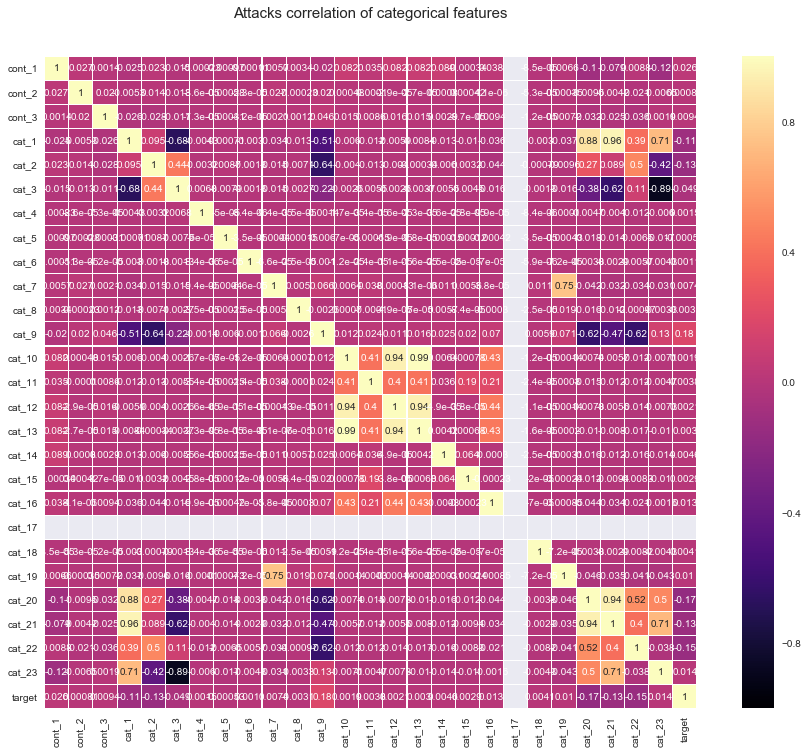

In [41]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Attacks correlation of categorical features', y=1.05, size=15)
sns.heatmap(train_int.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [42]:
df_cat=train_int.corr()
indices_cat = np.where(df_cat > 0.5)
indices_cat = [(df_cat.index[x], df_cat.columns[y]) for x, y in zip(*indices_cat)
                                        if x != y and x < y]
print(indices_cat)
print("Total correlated columns (Categorical) are %d" %(len(indices_cat)))

[('cat_1', 'cat_20'), ('cat_1', 'cat_21'), ('cat_1', 'cat_23'), ('cat_7', 'cat_19'), ('cat_10', 'cat_12'), ('cat_10', 'cat_13'), ('cat_12', 'cat_13'), ('cat_20', 'cat_21'), ('cat_20', 'cat_22'), ('cat_21', 'cat_23')]
Total correlated columns (Categorical) are 10


In [46]:
from sklearn.feature_selection import mutual_info_classif
mf = mutual_info_classif(train_float.values,train_data['target'],n_neighbors=3, random_state=17 )
print(mf)

[  4.36396148e-02   4.42570137e-02   1.57268594e-03   1.26360678e-04
   7.00916495e-02   5.77547789e-02   1.11143939e-01   1.14850860e-01
   1.10049402e-01   2.83999886e-01   1.87660271e-01   5.22656449e-02
   5.50335643e-02   8.20166272e-03   1.97023719e-02]


In [65]:
mf_sorted=mf.round(3)
print(mf_sorted)

[ 0.     0.002  0.008  0.02   0.044  0.044  0.052  0.055  0.058  0.07   0.11
  0.111  0.115  0.188  0.284]


In [108]:
bin_col=['cat_4','cat_8','cat_9','cat_11','cat_18','cat_19']
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train_data[col]==0).sum())
    one_list.append((train_data[col]==1).sum())
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

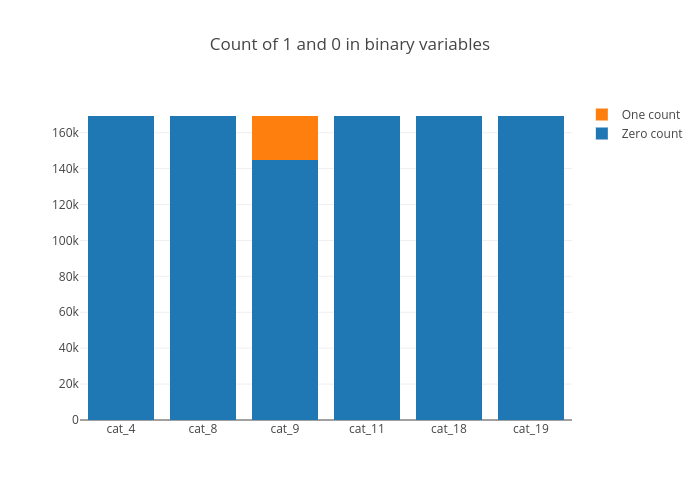

In [132]:
'''
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
import plotly.plotly as pyt
pyt.sign_in('ravichandra06061995', 'xdp9xK3nK9PaZ5mgl3bl')
pyt.image.save_as(fig, filename='binary_rel.png')
'''
from IPython.display import Image
Image('binary_rel.png')

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train_data.drop(['connection_id', 'target'],axis=1), train_data['target'])
features = train_data.drop(['connection_id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [141]:
features

array(['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6',
       'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7',
       'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14',
       'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20',
       'cat_21', 'cat_22', 'cat_23'], dtype=object)

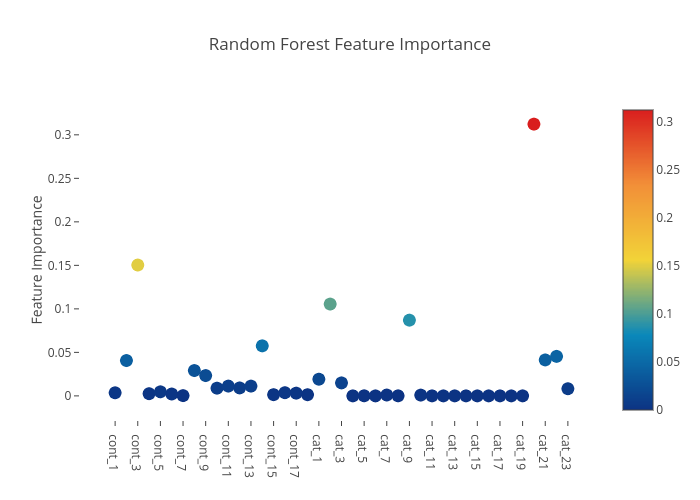

In [128]:
'''
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
import plotly.plotly as pyt
pyt.sign_in('ravichandra06061995', 'xdp9xK3nK9PaZ5mgl3bl')
pyt.image.save_as(fig, filename='binary.png')
'''
from IPython.display import Image
Image('binary.png')

In [138]:
rf_feature_imp=rf.feature_importances_.round(3)
data_feature_imp=pd.DataFrame(rf_feature_imp)

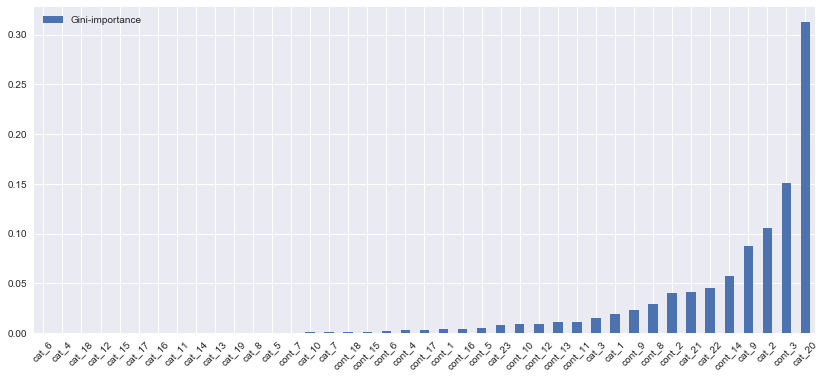

In [145]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(features, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(14, 6))

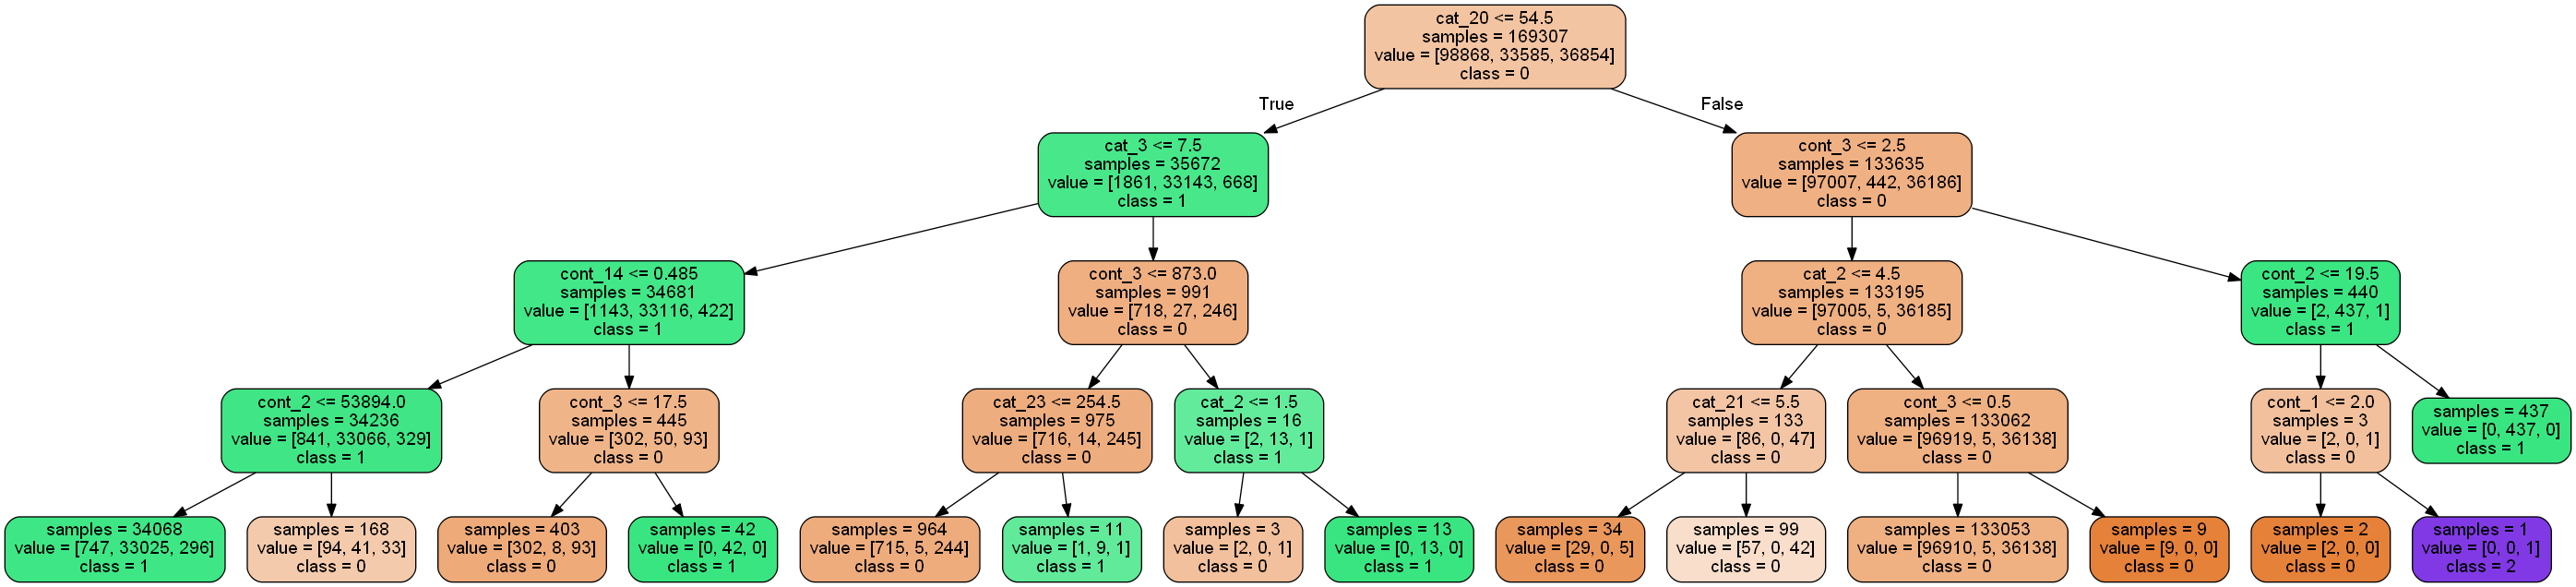

In [159]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(train_data.drop(['connection_id', 'target'],axis=1), train_data['target'])

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train_data.drop(['connection_id', 'target'],axis=1).columns.values,
                              class_names = ['0','1','2'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)


In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train_data.drop(['connection_id', 'target'],axis=1), train_data['target'])
features = train_data.drop(['connection_id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


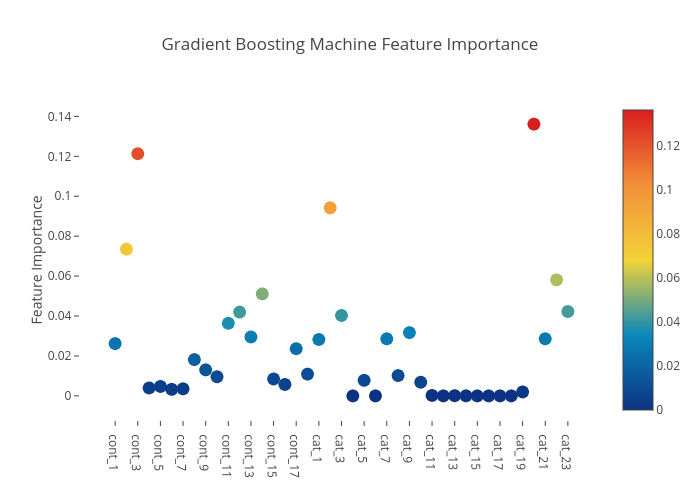

In [156]:
''''
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
pyt.sign_in('ravichandra06061995', 'xdp9xK3nK9PaZ5mgl3bl')
pyt.image.save_as(fig, filename='gb_imp.png')
'''
from IPython.display import Image
Image('gb_imp.png')

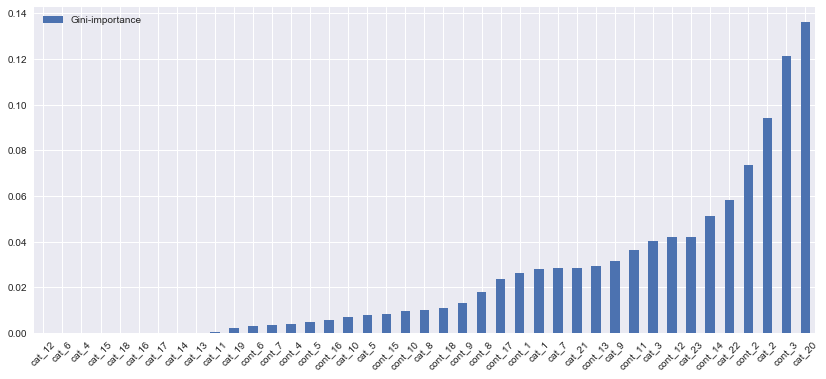

In [158]:
feats_gb = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(features, gb.feature_importances_):
    feats_gb[feature] = importance #add the name/value pair 

importances_gb = pd.DataFrame.from_dict(feats_gb, orient='index').rename(columns={0: 'Gini-importance'})
importances_gb.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(14, 6))

In [186]:
train=pd.read_csv('train_data.csv',sep=',')
X_train, X_test, y_train, y_test = train_test_split(train[train.columns[1:-1]], train['target'], train_size = 0.8,random_state = 42)

clf_1 =lgb.LGBMClassifier(n_estimators=80,num_leaves= 20,learning_rate=0.1)
clf_1 =clf_1.fit(X_train,y_train)

clf_2=LogisticRegression()
clf_2=clf_2.fit(X_train,y_train)

clf_3=tree.DecisionTreeClassifier()
clf_3=clf_3.fit(X_train,y_train)

from sklearn.ensemble import ExtraTreesClassifier
clf_4 =ExtraTreesClassifier()
clf_4=clf_4.fit(X_train,y_train)

from sklearn.naive_bayes import BernoulliNB
clf_5 =BernoulliNB()
clf_5=clf_5.fit(X_train,y_train)


pred_1 = clf_1.predict(X_test)
pred_2 = clf_2.predict(X_test)
pred_3 = clf_3.predict(X_test)
pred_4 = clf_4.predict(X_test)
pred_5 = clf_5.predict(X_test)

print("accuracy of LGBM is %f"%(accuracy_score(y_test,pred_1)))
print("accuracy of LR is %f"  %(accuracy_score(y_test,pred_2)))
print("accuracy of DTC is %f" %(accuracy_score(y_test,pred_3)))
print("accuracy of ETC is %f" %(accuracy_score(y_test,pred_4)))
print("accuracy of BNB is %f" %(accuracy_score(y_test,pred_5)))


accuracy of LGBM is 0.783888
accuracy of LR is 0.774762
accuracy of DTC is 0.761591
accuracy of ETC is 0.766552
accuracy of BNB is 0.760587


In [188]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.733713306952


In [189]:
pred_knn=knn.predict(X_test)

In [177]:
train_removed=train.drop(unimportant_columns,axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_removed[train_removed.columns[1:-1]], train_removed['target'], train_size = 0.8,random_state = 42)
clf =lgb.LGBMClassifier(n_estimators=80,num_leaves= 20,learning_rate=0.1)
clf =clf.fit(X_train,y_train)
pred_removed = clf.predict(X_test)
print("accuracy is %f" %(accuracy_score(y_test,pred_removed)))

accuracy is 0.783740


In [174]:
pred_without_removal.std()

0.40390221138368509

In [175]:
pred_removed.std()

0.40420800213433883

In [192]:
df_pred_1=pd.DataFrame(pred_1)
df_pred_2=pd.DataFrame(pred_2)
df_pred_3=pd.DataFrame(pred_3)
df_pred_4=pd.DataFrame(pred_4)
df_pred_5=pd.DataFrame(pred_5)
df_knn=pd.DataFrame(pred_knn)

In [204]:
con=pd.concat([df_pred_1,df_pred_2,df_pred_3,df_pred_4,df_pred_5,df_knn],axis=1)
con.head(n=10)
con.columns = ['LGBM','LR','DTC','ETC','BNB','KNN']

In [205]:
con.corr()

,LGBM,LR,DTC,ETC,BNB,KNN
LGBM,1.000000,0.960668,0.634739,0.681479,0.919229,0.429534
LR,0.960668,1.000000,0.618690,0.661086,0.924560,0.407892
DTC,0.634739,0.618690,1.000000,0.789696,0.588831,0.309768
ETC,0.681479,0.661086,0.789696,1.000000,0.628785,0.332034
BNB,0.919229,0.924560,0.588831,0.628785,1.000000,0.393448
KNN,0.429534,0.407892,0.309768,0.332034,0.393448,1.000000
